In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
! pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 1.2 MB/s 
     |████████████████████████████████| 453 kB 55.3 MB/s 


In [ ]:
import pandas as pd
f = open("/content/drive/MyDrive/data/text/news1.txt", 'r')
lines = f.readlines()
f.close()
#한나눔 형태소 분석기
from konlpy.tag import Hannanum
han = Hannanum()
temp = []
for i in range(len(lines)):
    #명사만 추출
    a=lines[i].strip()
temp.append(han.nouns(a))
# 2차원 리스트를 1차원 리스트로 변환하는 함수
def flatten(items):
    flatList = []
    for elem in items:
        if type(elem) == list:
            for e in elem:
                flatList.append(e)
        else:
            flatList.append(elem)
    return flatList
word_list=flatten(temp) # 2차원 => 1차원
# 두글자 이상인 단어만 추출
word_list=pd.Series([x for x in word_list if len(x)>1])


In [ ]:

word_list.value_counts().head(10)

지역      2
양질      1
일자리     1
본사제     1
추진      1
중소기업    1
지원      1
강화      1
강조      1
dtype: int64

In [ ]:
stopwords=['오후','오전']
word_list2=[i for i in word_list if i not in stopwords]

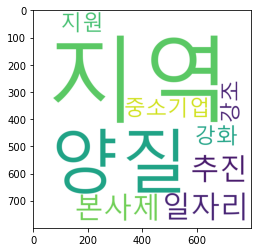

In [ ]:
from collections import Counter
from wordcloud import WordCloud
wordcloud=WordCloud( font_path='c:/windows/fonts/malgun.ttf', width=800,height=800,background_color='white')
import matplotlib.pyplot as plt
count=Counter(word_list2)
wordcloud=wordcloud.generate_from_frequencies(count)
plt.imshow(wordcloud)
plt.show()